In [2]:
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})

In [21]:
# creating dataframes from results files
df_heuristic = pd.read_csv('./results/results_heuristic.csv', index_col='Unnamed: 0')
df_RL_TF_5 = pd.read_csv('./results/results_RL_TL_5.csv', index_col='Unnamed: 0')
df_RL_TF_10 = pd.read_csv('./results/results_RL_TL_10.csv', index_col='Unnamed: 0')
df_RL_TF_15 = pd.read_csv('./results/results_RL_TL_15.csv', index_col='Unnamed: 0')

In [22]:
# combining all datasets and meaning

df = pd.concat([df_heuristic, df_RL_TF_5, df_RL_TF_10, df_RL_TF_15], axis = 1, keys=('heuristic', 'TF_5', 'TF_10', 'TF_15'))
df_meaned = df.groupby(('heuristic' ,'traffic_load')).mean()

In [23]:
# blocking probability vs traffic load

fig, ax = plt.subplots(dpi=300)
df_meaned.plot(
    y=[('heuristic', 'bp'), ('TF_5', 'bp'), ('TF_10', 'bp'), ('TF_15', 'bp')],
    ax = ax,
    grid=True
)
ax.legend(['Heuristic Algorithm', 'Model Trained With Traffic Load 5', 'Model Trained With Traffic Load 10', 'Model Trained With Traffic Load 15'])
ax.set_ylabel('Blocking Probability')
ax.set_xlabel('Traffic Load')
# plt.show()
plt.savefig('./figures/bp_vs_traffic_load.pgf', format='pgf')

In [24]:
df.iloc[270:300]

heuristic                                                                \
           bp avg_length blocked_continuous blocked_contiguous traffic_load   
270      0.00   2.900000                0.0                0.0          9.5   
271      0.05   2.842105                0.0                1.0          9.5   
272      0.05   2.842105                0.0                1.0          9.5   
273      0.00   2.900000                0.0                0.0          9.5   
274      0.05   2.947368                0.0                1.0          9.5   
275      0.05   2.842105                0.0                1.0          9.5   
276      0.00   2.800000                0.0                0.0          9.5   
277      0.05   2.842105                0.0                1.0          9.5   
278      0.05   2.842105                0.0                1.0          9.5   
279      0.05   2.842105                0.0                1.0          9.5   
280      0.00   2.800000                0.0                0.0          9.5   
281      0.05   2.842105                0.0                1.0          9.5   
282      0.05   2.842105                0.0                1.0          9.5   
283      0.00   2.900000                0.0                0.0          9.5   
284      0.05   2.842105                0.0                1.0          9.5   
285      0.00   2.900000                0.0                0.0          9.5   
286      0.05   2.842105                0.0                1.0          9.5   
287      0.00   2.900000                0.0                0.0          9.5   
288      0.00   2.900000                0.0                0.0          9.5   
289      0.00   2.900000                0.0                0.0          9.5   
290      0.00   2.900000                0.0                0.0          9.5   
291      0.00   2.900000                0.0                0.0          9.5   
292      0.05   2.842105                0.0                1.0          9.5   
293      0.05   2.947368                0.0                1.0          9.5   
294      0.05   2.947368                0.0                1.0          9.5   
295      0.05   2.947368                0.0                1.0          9.5   
296      0.05   2.947368                0.0                1.0          9.5   
297      0.00   2.900000                0.0                0.0          9.5   
298      0.05   2.842105                0.0                1.0          9.5   
299      0.00   2.900000                0.0                0.0          9.5   

     TF_5                                                               TF_10  \
       bp avg_length blocked_continuous blocked_contiguous traffic_load    bp   
270  0.30   5.000000                0.0           0.666667          9.5  0.30   
271  0.25   4.266667                0.0           0.400000          9.5  0.25   
272  0.25   4.000000                0.0           0.454545          9.5  0.35   
273  0.20   3.875000                0.0           0.250000          9.5  0.20   
274  0.20   4.000000                0.0           0.166667          9.5  0.15   
275  0.15   3.647059                0.0           0.142857          9.5  0.15   
276  0.15   3.529412                0.0           0.142857          9.5  0.65   
277  0.25   3.600000                0.0           0.214286          9.5  0.20   
278  0.15   3.294118                0.0           0.142857          9.5  0.25   
279  0.20   3.875000                0.0           0.214286          9.5  0.20   
280  0.10   3.777778                0.0           0.142857          9.5  0.25   
281  0.15   3.529412                0.0           0.071429          9.5  0.10   
282  0.25   4.266667                0.0           0.214286          9.5  0.15   
283  0.15   3.411765                0.0           0.071429          9.5  0.15   
284  0.15   3.764706                0.0           0.142857          9.5  0.20   
285  0.15   4.235294                0.0           0.214286          9.5  0.25   
286  0.25   4.400

In [25]:
# route length vs traffic load

fig, ax = plt.subplots(dpi=300)
df_meaned.plot(
    y=[('heuristic', 'avg_length'), ('TF_5', 'avg_length'), ('TF_10', 'avg_length'), ('TF_15', 'avg_length')],
    ax = ax,
    grid=True
)
ax.legend(['Heuristic Algorithm', 'Model Trained With Traffic Load 5', 'Model Trained With Traffic Load 10', 'Model Trained With Traffic Load 15'])
ax.set_ylabel('Average Route Length')
ax.set_xlabel('Traffic Load')
# plt.show()
plt.savefig('./figures/length_vs_traffic_load.pgf', format='pgf')

In [26]:
# route length vs blocking probability

fig, ax = plt.subplots(dpi=300)

agents = ['heuristic', 'TF_5', 'TF_10', 'TF_15']
for i in range(len(agents)):
    df_plot = df_meaned[[(agents[i], 'avg_length'), (agents[i], 'bp')]].sort_values(by=(agents[i], 'avg_length'))
    df_plot.plot(
        x=(agents[i], 'avg_length'),
        y=(agents[i], 'bp'),
        ax = ax,
        grid=True,
    )

ax.legend(['Heuristic Algorithm', 'Model Trained With Traffic Load 5', 'Model Trained With Traffic Load 10', 'Model Trained With Traffic Load 15'])
ax.set_ylabel('Blocking Probability')
ax.set_xlabel('Average Route Length')
# plt.show()
plt.savefig('./figures/length_vs_bp.pgf', format='pgf')


In [27]:
# contiguous blocking vs traffic load

fig, ax = plt.subplots(dpi=300)


df_meaned.plot(
    y=[('heuristic', 'blocked_contiguous'), ('TF_5', 'blocked_contiguous'), ('TF_10', 'blocked_contiguous'), ('TF_15', 'blocked_contiguous')],
    ax = ax,
    grid=True,
)

ax.legend(['Heuristic Algorithm', 'Model Trained With Traffic Load 5', 'Model Trained With Traffic Load 10', 'Model Trained With Traffic Load 15'])
ax.set_xlabel('Traffic Load')
ax.set_ylabel('Contiguous Blocking Probability')

# plt.show()
plt.savefig('./figures/bp_contiguous vs traffic load.pgf', format='pgf')

In [28]:
# continuous blocking vs traffic load

fig, ax = plt.subplots(dpi=300)


df_meaned.plot(
    y=[('heuristic', 'blocked_continuous'), ('TF_5', 'blocked_continuous'), ('TF_10', 'blocked_continuous'), ('TF_15', 'blocked_continuous')],
    ax = ax,
    grid=True,
)

ax.legend(['Heuristic Algorithm', 'Model Trained With Traffic Load 5', 'Model Trained With Traffic Load 10', 'Model Trained With Traffic Load 15'])
ax.set_xlabel('Traffic Load')
ax.set_ylabel('Per')

# plt.show()
plt.savefig('./figures/bp_continuous vs traffic load.pgf', format='pgf')

In [36]:
# finding requests blocked for no reason
df_bp = pd.DataFrame()
agents = ['heuristic', 'TF_5', 'TF_10', 'TF_15']

for agent in agents:
    df_bp[agent] = df[(agent, 'bp')] - (df[(agent, 'bp')]*(df[(agent, 'blocked_continuous')] + df[(agent, 'blocked_continuous')]))

In [39]:
df_bp['traffic_load'] = df[('heuristic', 'traffic_load')]

In [42]:
df_bp = df_bp.groupby('traffic_load').mean()

In [43]:
fig, ax = plt.subplots(dpi=300)


df_bp.plot(
    y=agents,
    ax = ax,
    grid=True,
)

ax.legend(['Heuristic Algorithm', 'Model Trained With Traffic Load 5', 'Model Trained With Traffic Load 10', 'Model Trained With Traffic Load 15'])
ax.set_xlabel('Traffic Load')
ax.set_ylabel('Percentage Blocked Requests No Reason')

# plt.show()
plt.savefig('./figures/bp_no_reason vs traffic load.pgf', format='pgf')

In [14]:
df_5_new = pd.read_csv('./results/updated_results_RL_TL_5.csv')
df_5_new['no_reason'] = 1 - df_5_new['blocked_continuous'] - df_5_new['blocked_contiguous']

<AxesSubplot:xlabel='traffic_load'>

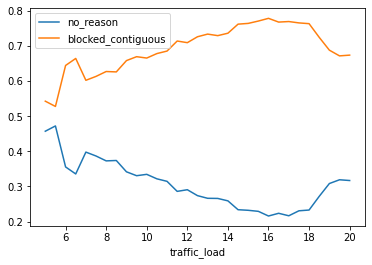

In [18]:
df_5_new.groupby('traffic_load').mean().plot(
    y=['no_reason', 'blocked_contiguous']
)